<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:50%;color:blue;text-align:center">    <FONT COLOR="blue">  
            Detección de imagenes sensible </p> desde el LLM hacia el usuario       </FONT>         </h1>
        </td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">  </p> ARQUITECTURA DE PROTECCIÓN DE PRIVACIDAD  </p> DE DATOS PARA MODELOS DE LENGUAJE DE GRAN TAMAÑO (LLM) USANDO CHATGPT </p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría MACC 2025</p></tp>
            <tp><p style="font-size:115%;text-align:center">Sofia Bonilla - Danna Ocampo - Daniel Lopez - Pedro Wightman</p></tp>
        </td>
    </tr>
</table>

<FONT SIZE=5\ COLOR="purple">Instalación de Bibliotecas y Herramientas Necesarias</h2>

### 📌 Descripción de Librerías

- **tesseract-ocr**: Es un motor de reconocimiento óptico de caracteres (OCR) de código abierto desarrollado por Google. Se utiliza para extraer texto de imágenes o documentos escaneados.
- **pytesseract**: Es un contenedor en Python para Tesseract-OCR. Permite interactuar con Tesseract desde Python y facilita la extracción de texto de imágenes dentro de programas y scripts.
- **ultralytics.YOLO**: Es una implementación de la arquitectura YOLO (*You Only Look Once*) desarrollada por Ultralytics. Se usa para la detección de objetos en imágenes y videos, y ofrece modelos preentrenados para tareas de visión por computadora.


In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.1 MB/s eta 0:00:00


In [2]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [3]:
!pip install pytesseract

In [4]:
!pip install sympy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [24]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.9 MB/s eta 0:00:00


In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skfuzzy as fuzz
import skfuzzy.control as ctrl

<FONT SIZE=5\ COLOR="purple"> Entrenamiento de YOLOv8 para la detección y clasificación de datos sensibles

---



Se utiliza la librería **Ultralytics YOLO** para entrenar un modelo de detección de objetos basado en **YOLOv8**, con el propósito de ajustar un modelo preentrenado (`yolov8s.pt`) a un nuestro conjunto de datos definido en `data.yaml`, permitiendo mejorar la precisión en la detección de objetos específicos.

## Proceso de Entrenamiento:
1. **Importación de la librería**: Se importa **YOLO** desde `ultralytics` para trabajar con la implementación de **YOLOv8**.
2. **Carga del modelo preentrenado**: Se utiliza `yolov8s.pt`, que ya tiene pesos optimizados en un dataset general como **COCO**.
3. **Entrenamiento**:
   - Se entrena el modelo utilizando los datos en `data.yaml` este archivo es fundamental ya que le indica a YOLO cómo estructurar el dataset y qué clases debe detectar.
   - Se establecen **50 épocas** para mejorar la convergencia.
   - Se usa un **tamaño de imagen de 640x640**, lo que aumenta la precisión a costa de mayor uso de memoria.
   - Se define un **batch size de 16**, ajustado según la capacidad de la RAM.
4. **Organización del entrenamiento**: El resultado del entrenamiento se almacena bajo el nombre `'yolov8_optimizado'` para facilitar la organización de experimentos.

## Consideraciones Tecnológicas y Buenas Prácticas:
- **YOLOv8** se aplica para **detección de objetos mediante deep learning**.
- Configurar correctamente los hiperparámetros es clave:
  - **Aumentar epochs e imgsz** mejora la precisión pero **incrementa el tiempo de entrenamiento y el uso de memoria**.
  - **Ajustar el batch size** según la RAM disponible previene **errores por falta de recursos**.
- El código sigue buenas prácticas para **entrenar modelos de detección de objetos de manera eficiente**.

**En resumen**, este código permite entrenar **YOLOv8** optimizando hiperparámetros para lograr un balance entre precisión y rendimiento computacional.


In [16]:
from ultralytics import YOLO

# Cargar el modelo preentrenado YOLOv8
model = YOLO('yolov8s.pt')

# Entrenar el modelo con los datos aumentados y otros ajustes
model.train(data='/content/drive/MyDrive/modelos finales/primer entreno bien/datosOpcion3-20241029T231913Z-001/datosOpcion3/data.yaml',
            epochs=50,       # Aumentar las épocas para mejor convergencia
            imgsz=640,       # Aumentar el tamaño de imagen para más precisión
            batch=16,        # Mantener el batch size dependiendo de la RAM disponible
            name='yolov8_optimizado')

Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/modelos finales/primer entreno bien/datosOpcion3-20241029T231913Z-001/datosOpcion3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_optimizado12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /content/drive/MyDrive/modelos finales/primer entreno bien/datosOpcion3-20241029T231913Z-001/datosOpcion3/train/labels.cache... 2447 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2450/2450 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 378, len(boxes) = 9358. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/modelos finales/primer entreno bien/datosOpcion3-20241029T231913Z-001/datosOpcion3/valid/labels.cache... 524 images, 1 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 92, len(boxes) = 2337. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/yolov8_optimizado12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8_optimizado12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.39G      1.238      2.219      1.299         17        640: 100%|██████████| 154/154 [00:23<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]

                   all        525       2337      0.701      0.728      0.784      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.97G      1.088      1.133        1.2         13        640: 100%|██████████| 154/154 [00:18<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.39it/s]

                   all        525       2337      0.729      0.764      0.801      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.99G       1.08      1.067      1.202         34        640: 100%|██████████| 154/154 [00:17<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]

                   all        525       2337       0.74      0.765      0.797      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.89G      1.052     0.9849      1.187         23        640: 100%|██████████| 154/154 [00:16<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.75it/s]

                   all        525       2337      0.763      0.776      0.802      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.04G      1.039     0.9414      1.172         39        640: 100%|██████████| 154/154 [00:17<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.34it/s]

                   all        525       2337      0.818      0.788      0.838      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.96G      1.014     0.9151       1.17          8        640: 100%|██████████| 154/154 [00:16<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.47it/s]

                   all        525       2337      0.708      0.727      0.771      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.07G     0.9818     0.8515      1.143          9        640: 100%|██████████| 154/154 [00:16<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.67it/s]

                   all        525       2337      0.772       0.79      0.823      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.95G      0.971     0.8336       1.14          3        640: 100%|██████████| 154/154 [00:17<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]

                   all        525       2337       0.83      0.848      0.869      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.96G     0.9806     0.8288      1.151         24        640: 100%|██████████| 154/154 [00:16<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.32it/s]

                   all        525       2337      0.817      0.843      0.879      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       3.9G     0.9504     0.7957      1.123         17        640: 100%|██████████| 154/154 [00:16<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.83it/s]

                   all        525       2337      0.806      0.797      0.865      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.92G     0.9393     0.7753       1.13         24        640: 100%|██████████| 154/154 [00:17<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.42it/s]

                   all        525       2337      0.798       0.86      0.873      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.89G     0.9267     0.7489      1.114         37        640: 100%|██████████| 154/154 [00:16<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]

                   all        525       2337      0.874      0.837      0.893      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.1G     0.9066     0.7314      1.107          4        640: 100%|██████████| 154/154 [00:17<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.68it/s]

                   all        525       2337       0.87      0.845      0.897      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.98G     0.9015     0.7221      1.095          9        640: 100%|██████████| 154/154 [00:17<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.56it/s]

                   all        525       2337      0.863      0.869      0.894      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.87G     0.9089     0.6975        1.1          9        640: 100%|██████████| 154/154 [00:16<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.58it/s]

                   all        525       2337      0.844      0.864      0.893      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.94G     0.8694     0.6984      1.081         17        640: 100%|██████████| 154/154 [00:16<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.82it/s]

                   all        525       2337      0.841      0.841      0.882      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         4G     0.8816     0.6848      1.094         10        640: 100%|██████████| 154/154 [00:17<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.63it/s]

                   all        525       2337       0.89      0.872      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.93G     0.8695      0.697      1.084         32        640: 100%|██████████| 154/154 [00:16<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.56it/s]

                   all        525       2337      0.859      0.879      0.908      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.98G      0.838     0.6517      1.063         19        640: 100%|██████████| 154/154 [00:16<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.78it/s]

                   all        525       2337      0.872       0.85      0.905      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.98G     0.8471     0.6482      1.068         11        640: 100%|██████████| 154/154 [00:17<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.55it/s]

                   all        525       2337      0.884      0.871      0.914      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.09G     0.8541     0.6445      1.072          6        640: 100%|██████████| 154/154 [00:16<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]

                   all        525       2337      0.905      0.885      0.923      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.94G     0.8405     0.6293      1.061          8        640: 100%|██████████| 154/154 [00:16<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  7.00it/s]

                   all        525       2337       0.87      0.894      0.912      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.89G     0.8265     0.6344      1.058          5        640: 100%|██████████| 154/154 [00:17<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.47it/s]

                   all        525       2337      0.893      0.876      0.912      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.94G     0.8257     0.6001      1.047         39        640: 100%|██████████| 154/154 [00:16<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.51it/s]

                   all        525       2337      0.891      0.908      0.932        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.92G     0.8193     0.6144      1.058          5        640: 100%|██████████| 154/154 [00:16<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.87it/s]

                   all        525       2337      0.897      0.888      0.923      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       3.9G     0.8058     0.5896      1.041         25        640: 100%|██████████| 154/154 [00:16<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.45it/s]

                   all        525       2337      0.921      0.881      0.929      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.07G     0.7941      0.585      1.035         18        640: 100%|██████████| 154/154 [00:16<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.60it/s]

                   all        525       2337        0.9      0.882      0.927      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.02G     0.7876     0.5798       1.03          5        640: 100%|██████████| 154/154 [00:16<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.90it/s]

                   all        525       2337      0.875      0.919      0.927      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.93G     0.7924     0.5742      1.038         13        640: 100%|██████████| 154/154 [00:16<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]

                   all        525       2337      0.899      0.887      0.925      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.97G     0.7776     0.5708      1.032         12        640: 100%|██████████| 154/154 [00:16<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]

                   all        525       2337      0.902      0.886      0.929       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.93G      0.778     0.5629      1.029          6        640: 100%|██████████| 154/154 [00:16<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  7.18it/s]

                   all        525       2337      0.894      0.895      0.928      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.97G     0.7673     0.5503      1.027         17        640: 100%|██████████| 154/154 [00:17<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]

                   all        525       2337      0.886      0.905      0.932      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.08G     0.7626     0.5441      1.025          7        640: 100%|██████████| 154/154 [00:16<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.58it/s]

                   all        525       2337       0.91      0.895      0.933      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.94G     0.7509     0.5309      1.009          9        640: 100%|██████████| 154/154 [00:16<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.76it/s]

                   all        525       2337      0.919      0.896      0.935      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.07G     0.7458     0.5099      1.007         13        640: 100%|██████████| 154/154 [00:16<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]

                   all        525       2337      0.917        0.9      0.932      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.97G     0.7379      0.519      1.009         11        640: 100%|██████████| 154/154 [00:16<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]

                   all        525       2337      0.909      0.903      0.936      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.02G     0.7281     0.5092      1.007         35        640: 100%|██████████| 154/154 [00:16<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.85it/s]

                   all        525       2337      0.902       0.91      0.936      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.02G      0.723     0.4975     0.9994         39        640: 100%|██████████| 154/154 [00:16<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.61it/s]

                   all        525       2337      0.903      0.917      0.942      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.07G     0.7244     0.4967     0.9946         20        640: 100%|██████████| 154/154 [00:16<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.71it/s]

                   all        525       2337      0.907      0.899      0.937      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.94G      0.721      0.494     0.9981          9        640: 100%|██████████| 154/154 [00:17<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.98it/s]

                   all        525       2337      0.903      0.904      0.937      0.733


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.92G     0.7153     0.4578     0.9923          7        640: 100%|██████████| 154/154 [00:17<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]

                   all        525       2337      0.911      0.909      0.942      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.94G     0.6958     0.4243      0.973         20        640: 100%|██████████| 154/154 [00:16<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.84it/s]

                   all        525       2337      0.879      0.927      0.935      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.07G     0.6917     0.4264      0.987          4        640: 100%|██████████| 154/154 [00:16<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  7.00it/s]

                   all        525       2337      0.933      0.908      0.943      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.95G     0.6819      0.414     0.9707         20        640: 100%|██████████| 154/154 [00:16<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]

                   all        525       2337      0.928      0.907      0.948      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.07G     0.6697     0.4023     0.9666         11        640: 100%|██████████| 154/154 [00:16<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.70it/s]

                   all        525       2337      0.917      0.929      0.947      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.94G     0.6579     0.3994     0.9552         18        640: 100%|██████████| 154/154 [00:16<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.70it/s]

                   all        525       2337      0.933      0.915      0.949      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.07G      0.639     0.3916     0.9506          3        640: 100%|██████████| 154/154 [00:16<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.60it/s]

                   all        525       2337      0.932      0.908      0.946      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.94G     0.6428     0.3835     0.9475         18        640: 100%|██████████| 154/154 [00:16<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.45it/s]

                   all        525       2337      0.936      0.925      0.949      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.07G     0.6348      0.387     0.9494          2        640: 100%|██████████| 154/154 [00:16<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.77it/s]

                   all        525       2337      0.928      0.922      0.949      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.94G     0.6311     0.3731     0.9437          2        640: 100%|██████████| 154/154 [00:16<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.43it/s]

                   all        525       2337      0.929      0.931      0.951      0.753



50 epochs completed in 0.287 hours.
Optimizer stripped from runs/detect/yolov8_optimizado12/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8_optimizado12/weights/best.pt, 22.5MB

Validating runs/detect/yolov8_optimizado12/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 168 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.64it/s]


                   all        525       2337       0.93      0.931      0.951      0.753
               animals         75        195      0.835      0.815      0.853      0.616
                 faces         75         75       0.99      0.973      0.989      0.923
                IDcard         75       1276       0.95       0.94      0.953      0.765
                credit         75        218      0.977          1      0.995      0.833
                  Drug         74        270      0.954      0.885      0.935      0.693
             landscape         75         81      0.919      0.938      0.968      0.748
                nature         75        222      0.884      0.964      0.966      0.689
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/yolov8_optimizado12


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787e1a78d2a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

<FONT SIZE=5\ COLOR="purple"> Evaluación del Modelo YOLOv8 en Datos Sensibles y No Sensibles



Se evalúa el rendimiento del modelo **YOLOv8** en un conjunto de validación utilizando `model.val()`, que genera métricas clave como **mAP50-95, precisión y recall** para cada clase definida en `data.yaml`.

### Proceso de Evaluación:
1. **Definición de clases**: Se establece un diccionario con los nombres de las clases (**animals, faces, IDcard, explicitcontent**, etc.), permitiendo asociar cada índice con su respectiva categoría.
2. **Extracción de métricas**: Se extraen los valores de **mAP50-95** desde `metrics.box.maps`.
3. **Almacenamiento de datos**: Se recorre el diccionario de clases para almacenar las métricas en una lista estructurada.
4. **Manejo de clases sin datos**: Si no hay datos disponibles para una clase, se muestra una advertencia.
5. **Impresión de métricas**: Finalmente, se imprimen los resultados para su análisis.

Este se uso  para **evaluar la efectividad del modelo en la detección de datos sensibles y no sensibles**.

In [19]:
# Evaluar el modelo en el conjunto de validación
metrics = model.val(data='/content/drive/MyDrive/modelos finales/primer entreno bien/datosOpcion3-20241029T231913Z-001/datosOpcion3/data.yaml')

# Diccionario de nombres de las clases
names = {
    0: 'animals', 1: 'faces', 2: 'IDcard', 3: 'explicitcontent',
    4: 'credit', 5: 'Drug', 6: 'landscape', 7: 'nature', 8: 'objects'
}

# Obtener las métricas de mAP50-95 por clase desde 'metrics.box.maps'
maps = metrics.box.maps

# Lista para almacenar las métricas por clase
metricas_clases = []

# Extraer métricas por clase
for idx, class_name in names.items():
    if idx < len(maps):  # Verifica si el índice está dentro del rango de 'maps'
        # Agregar métricas de cada clase a la lista
        metricas_clases.append({
            'Clase': class_name,
            'mAP50-95': maps[idx],
            'Precision': metrics.box.maps[idx],  # Utilizar métricas disponibles
            'Recall': metrics.box.maps[idx]  # Utilizar métricas disponibles
        })
    else:
        print(f"Advertencia: No hay métricas disponibles para la clase '{class_name}'.")

# Imprimir la lista de métricas por clase
for metrica in metricas_clases:
    print(metrica)

Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


val: Scanning /content/drive/MyDrive/modelos finales/primer entreno bien/datosOpcion3-20241029T231913Z-001/datosOpcion3/valid/labels.cache... 524 images, 1 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 92, len(boxes) = 2337. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.45it/s]


                   all        525       2337      0.928      0.932      0.951      0.754
               animals         75        195      0.833      0.817      0.854      0.616
                 faces         75         75      0.989      0.973      0.989      0.923
                IDcard         75       1276      0.952      0.942      0.954      0.769
                credit         75        218      0.977          1      0.995      0.833
                  Drug         74        270      0.948      0.885      0.935      0.695
             landscape         75         81      0.917      0.938      0.968      0.751
                nature         75        222      0.881      0.968      0.966      0.691
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/yolov8_optimizado123
{'Clase': 'animals', 'mAP50-95': 0.616087991459778, 'Precision': 0.616087991459778, 'Recall': 0.616087991459778}
{'Clase': 'faces', 'mAP50-95': 0.9225103632

<FONT SIZE=5\ COLOR="purple"> Implementación de un Sistema de Ofuscación Inteligente Basado en Lógica Difusa y YOLOv8



Ahora se implementa un **sistema de ofuscación inteligente** que combina **lógica difusa** con el modelo **YOLOv8** previamente entrenado, con el objetivo de **detectar y ocultar datos sensibles** en imágenes.

## Proceso del Sistema

El proceso comienza con la configuración de **cinco entradas difusas** correspondientes a las clases de datos sensibles que el modelo es capaz de identificar:

- **faces**
- **IDcard**
- **explicitcontent**
- **credit**
- **Drug**

Cada una de estas clases presenta **dos estados posibles**: `'no_detectado'` y `'detectado'`, los cuales indican la presencia o ausencia del objeto en la imagen.  
La **salida del sistema**, denominada **'ofuscación'**, se define en tres niveles: **bajo, medio y alto**, dependiendo del grado de sensibilidad de la información identificada.

## Definición de Reglas Difusas

Para determinar la intensidad de la ofuscación, se establecen las siguientes reglas:

- **Clases altamente sensibles** (`faces`, `IDcard` y `explicitcontent`) requieren un nivel de **ofuscación alto**.
- **Clases de sensibilidad media** (`credit` y `Drug`) reciben una **ofuscación moderada**.

##  Implementación del Modelo

1. **Detección de Objetos con YOLOv8**  
   El modelo YOLOv8 detecta objetos en la imagen, extrayendo las **clases identificadas** junto con sus **coordenadas**.

2. **Actualización del Sistema Difuso**  
   - Se asigna un **valor de 1** a las clases detectadas.
   - Se mantiene en **0** las clases no detectadas.

3. **Cálculo del Nivel de Ofuscación**  
   Se ejecuta la simulación para determinar la intensidad del desenfoque que se aplicará.

4. **Aplicación del Desenfoque Gaussiano**  
   - **Objetos altamente sensibles** son ofuscados con un **desenfoque más intenso**.
   - **Objetos de menor sensibilidad** reciben una **distorsión más sutil**.


Finalmente, la imagen procesada se presenta con las áreas ofuscadas de acuerdo con su nivel de privacidad.  



image 1/1 /content/drive/MyDrive/modelos finales/Imagenes/raza.PNG: 544x640 1 faces, 54.6ms
Speed: 4.1ms preprocess, 54.6ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)
Nivel de ofuscación calculado: 86.66666666666664


(-0.5, 191.5, 157.5, -0.5)

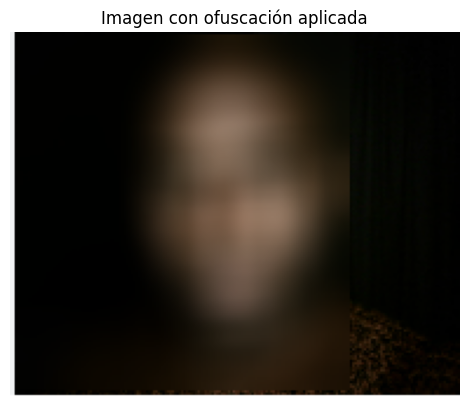

In [26]:
# Configurar las entradas difusas y el sistema de control
faces = ctrl.Antecedent(np.arange(0, 2, 1), 'faces')
idcard = ctrl.Antecedent(np.arange(0, 2, 1), 'IDcard')
explicitcontent = ctrl.Antecedent(np.arange(0, 2, 1), 'explicitcontent')
credit = ctrl.Antecedent(np.arange(0, 2, 1), 'credit')
drug = ctrl.Antecedent(np.arange(0, 2, 1), 'Drug')
ofuscacion = ctrl.Consequent(np.arange(0, 101, 1), 'ofuscacion')

# Definir funciones de pertenencia
for var in [faces, idcard, explicitcontent, credit, drug]:
    var['no_detectado'] = fuzz.trimf(var.universe, [0, 0, 0.5])
    var['detectado'] = fuzz.trimf(var.universe, [0.5, 1, 1])



ofuscacion['baja'] = fuzz.trimf(ofuscacion.universe, [0, 0, 40])
ofuscacion['media'] = fuzz.trimf(ofuscacion.universe, [30, 50, 70])
ofuscacion['alta'] = fuzz.trimf(ofuscacion.universe, [60, 100, 100])

# Definir reglas de ofuscación
regla1 = ctrl.Rule(faces['detectado'], ofuscacion['alta'])
regla2 = ctrl.Rule(idcard['detectado'], ofuscacion['alta'])
regla3 = ctrl.Rule(explicitcontent['detectado'], ofuscacion['alta'])
regla4 = ctrl.Rule(credit['detectado'], ofuscacion['media'])
regla5 = ctrl.Rule(drug['detectado'], ofuscacion['media'])

# Crear el sistema de control
sistema_control = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5])
simulacion = ctrl.ControlSystemSimulation(sistema_control)

# Cargar la imagen y realizar la predicción
img_path = '/content/drive/MyDrive/modelos finales/Imagenes/raza.PNG'
results = model.predict(img_path, conf=0.5)

# Procesar los resultados de detección
img = cv2.imread(img_path)
detecciones = results[0].boxes.xyxy.cpu().numpy()  # Coordenadas de las detecciones
clases_detectadas = results[0].boxes.cls.cpu().numpy()  # Clases detectadas

# Inicializar todas las entradas con un valor predeterminado de 0
simulacion.input['faces'] = 0
simulacion.input['IDcard'] = 0
simulacion.input['explicitcontent'] = 0
simulacion.input['credit'] = 0
simulacion.input['Drug'] = 0

# Asignar un valor de 1 si la clase fue detectada
for clase in clases_detectadas:
    if clase == 1:  # 'faces'
        simulacion.input['faces'] = 1
    elif clase == 2:  # 'IDcard'
        simulacion.input['IDcard'] = 1
    elif clase == 3:  # 'explicitcontent'
        simulacion.input['explicitcontent'] = 1
    elif clase == 4:  # 'credit'
        simulacion.input['credit'] = 1
    elif clase == 5:  # 'Drug'
        simulacion.input['Drug'] = 1

# Ejecutar la simulación para calcular el nivel de ofuscación
simulacion.compute()
nivel_ofuscacion = simulacion.output['ofuscacion']
print(f"Nivel de ofuscación calculado: {nivel_ofuscacion}")

# Aplicar ofuscación a las áreas detectadas según el nivel de sensibilidad de la clase
for clase, det in zip(clases_detectadas, detecciones):
    x1, y1, x2, y2 = map(int, det)

    if clase == 1:  # 'faces' -> nivel alto de ofuscación
        roi = img[y1:y2, x1:x2]
        img[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (25, 25), 50)  # Desenfoque más fuerte
    elif clase == 2:  # 'IDcard' -> nivel alto de ofuscación
        roi = img[y1:y2, x1:x2]
        img[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (25, 25), 50)  # Desenfoque más fuerte
    elif clase == 3:  # 'explicitcontent' -> nivel alto de ofuscación
        roi = img[y1:y2, x1:x2]
        img[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (25, 25), 50)  # Desenfoque más fuerte
    elif clase == 4:  # 'credit' -> nivel medio de ofuscación
        roi = img[y1:y2, x1:x2]
        img[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (15, 15), 30)  # Desenfoque medio
    elif clase == 5:  # 'Drug' -> nivel medio de ofuscación
        roi = img[y1:y2, x1:x2]
        img[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (15, 15), 30)  # Desenfoque medio

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen con ofuscación aplicada')
plt.axis('off')